## Linear Regression With One Variable
In this part of this exercise,  you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant  franchise  and  are  considering  different  cities  for  opening  a  new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.You would like to use this data to help you select which city to expand to next. 

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Visualizing the data
ex1_df = pd.read_csv('ex1data1.txt')
ex1_df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


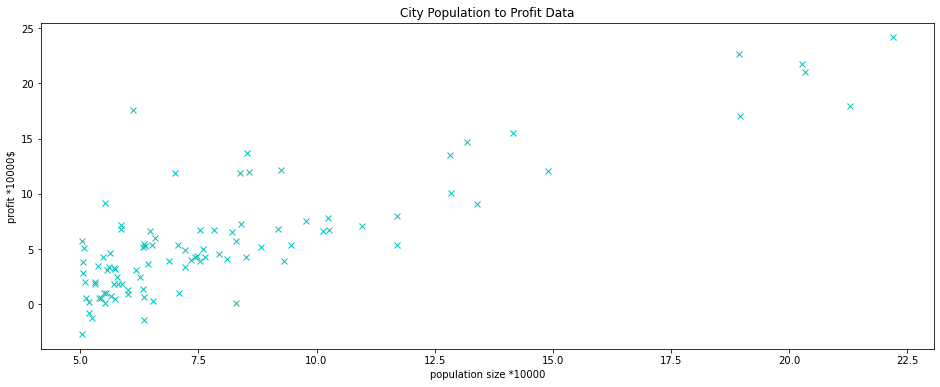

In [3]:
# Setting up parameters to plot the training data
xx = ex1_df['population']
yy = ex1_df['profit']

plt.figure(figsize=(16, 6))
plt.xlabel('population size *10000')
plt.ylabel('profit *10000$')
plt.title("City Population to Profit Data")
plt.plot(xx,yy, 'xc')
plt.show()

In [4]:
# Adding a column of 1's into the training data (for matrix multiplication)
ex1_df.insert(0, 'ones', 1)
#del ex1_df['ones'] #to delete a column
ex1_df.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [5]:
# Putting 1's and population in X data frame, and profit into y data frame
cols = ex1_df.shape[1]

X_df = ex1_df.iloc[:,0:cols-1]
y_df = ex1_df.iloc[:,cols-1:cols]

# Converting the data frames into matricies with numpy
X = np.matrix(X_df.values)
y = np.matrix(y_df.values)
theta = np.matrix(np.zeros(2))

# Setting up parameters for gradient descent iterations
m = len(y)
alpha = 0.01
iters = 1200

In [6]:
# Cost Function
def computeCost(X, y, theta, m):
    
    difference = (X*theta.T)-y # output of hypothesis function (prediction) - an actualy value
    J = (1/(2*m) * np.power(difference,2)).sum()
    
    return J

In [7]:
# Checking if the Cost Function Works
J = computeCost(X,y,theta,m)
J_test = computeCost(X,y,np.matrix([-1,2]),m)

print("Cost function for theta=[0;0]  is {}".format(J))
print("Cost function for theta=[-1;2] is {}".format(J_test))

Cost function for theta=[0;0]  is 32.07273387745567
Cost function for theta=[-1;2] is 54.24245508201237


In [8]:
#Gradient Descent algorithm for updating parameter values
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #creating a temporary parameter matrix by copying the shape of theta
    parameters = theta.ravel().shape[1]     #the number of parameters to update
    cost = np.zeros(iters)                  #creating an array to store cost function values after each iteration
    
    for i in range(iters):
        difference = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(difference, X[:,j]) #multiply difference matrix by 1st, and then 2nd column of X matrix
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #write the updated parameters into temp
            
        theta = temp 
        cost[i] = computeCost(X, y, theta, m) # updating cost function values
        
    return theta, cost

In [9]:
# Checking if Gradient Descent Works
theta_update, cost = gradientDescent(X, y, theta, alpha, iters)
print("After {} iterations, theta now has values {}".format(iters, theta_update))

After 1200 iterations, theta now has values [[-3.43962171  1.14720751]]


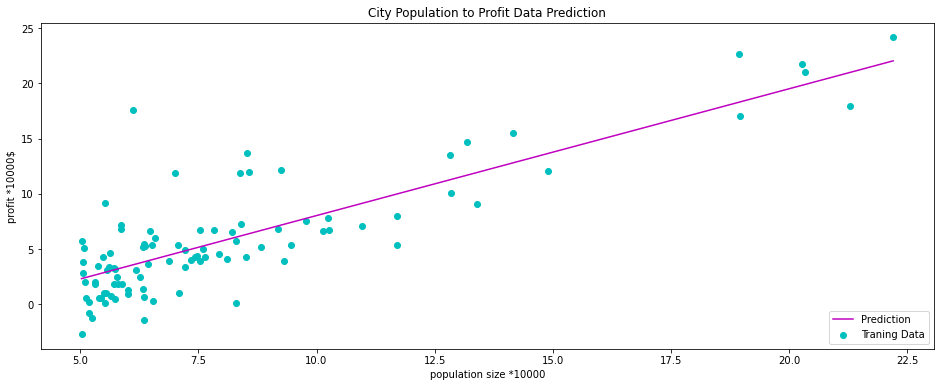

In [10]:
# Plotting training data with a fitting function on it
x = np.linspace(ex1_df.population.min(), ex1_df.population.max(), 100) 
# alternatively it is okay to just use xx, but the line will apper dotted, and not as a straight line
fitting_function = theta_update[0,0] + (theta_update[0,1]*x)

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, fitting_function, c='m', label='Prediction') #plotting the fitting line
ax.scatter(ex1_df.population, ex1_df.profit, c='c',label='Traning Data')

ax.set_xlabel('population size *10000')
ax.set_ylabel('profit *10000$')
ax.set_title('City Population to Profit Data Prediction')
ax.legend(loc=4)

plt.show()

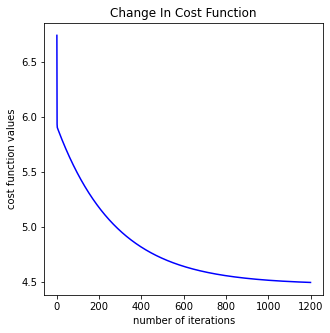

In [11]:
# Plotting the evolution of the cost function throughout Gradient Descent
plt.figure(figsize=(5, 5))
plt.xlabel('number of iterations')
plt.ylabel('cost function values')
plt.title("Change In Cost Function")
plt.plot(np.arange(iters), cost, c='b')
plt.show()

## Linear Regression With Multiple Variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose  you  are  selling  your  house  and  you want to know what a good market price would be. One way to do this is tofirst collect information on recent houses sold and make a model of housingprices.

The file ex1data2.txt contains a training set of housing prices in Port-land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [12]:
# Visualizing the data
ex1m_df = pd.read_csv('ex1data2.txt')
ex1m_df.head()

,house_size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [13]:
# Feature Normalization
ex1m_norm_df = (ex1m_df - ex1m_df.mean())/ex1m_df.std()
ex1m_norm_df.head()

,house_size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [14]:
ex1m_norm_df.insert(0, 'ones', 1)
ex1m_norm_df.head()

,ones,house_size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [15]:
# Putting 1's and house_size and bedrooms in X data frame, and price into y data frame
cols_m = ex1m_norm_df.shape[1]

X_m_df = ex1m_norm_df.iloc[:,0:cols_m-1]
y_m_df = ex1m_norm_df.iloc[:,cols_m-1:cols_m]

# Converting the data frames into matricies with numpy
X_m = np.matrix(X_m_df.values)
y_m = np.matrix(y_m_df.values)
theta_m = np.matrix(np.zeros(3))

In [16]:
# Trying different learning rates
alpha_1 = 0.01
iters = 300
theta_m_update1, cost_m_1 = gradientDescent(X_m, y_m, theta_m, alpha_1, iters)

print("After {} iterations, theta now has values {}".format(iters, theta_m_update1))

After 300 iterations, theta now has values [[-1.35187370e-16  7.52175361e-01  7.11826700e-02]]


In [17]:
alpha_2 = 0.05
theta_m = np.matrix(np.zeros(3))
theta_m_update2, cost_m_2 = gradientDescent(X_m, y_m, theta_m, alpha_2, iters)

print("After {} iterations, theta now has values {}".format(iters, theta_m_update2))

After 300 iterations, theta now has values [[-1.11228993e-16  8.84082182e-01 -5.24950135e-02]]


In [18]:
alpha_3 = 0.007
theta_m = np.matrix(np.zeros(3))
theta_m_update3, cost_m_3 = gradientDescent(X_m, y_m, theta_m, alpha_3, iters)

print("After {} iterations, theta now has values {}".format(iters, theta_m_update3))

After 300 iterations, theta now has values [[-1.24419387e-16  6.78638529e-01  1.19838174e-01]]


In [19]:
alpha_4 = 0.1
theta_m = np.matrix(np.zeros(3))
theta_m_update4, cost_m_4 = gradientDescent(X_m, y_m, theta_m, alpha_4, iters)

print("After {} iterations, theta now has values {}".format(iters, theta_m_update4))

After 300 iterations, theta now has values [[-1.09664051e-16  8.84765126e-01 -5.31779575e-02]]


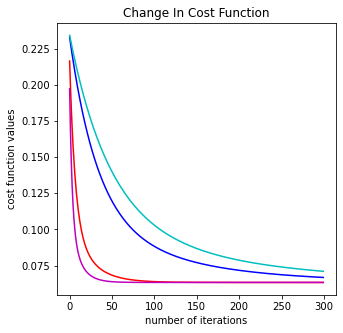

In [20]:
# Plotting the evolution of the cost function throughout Gradient Descent
plt.figure(figsize=(5, 5))
plt.xlabel('number of iterations')
plt.ylabel('cost function values')
plt.title("Change In Cost Function")
plt.plot(np.arange(iters), cost_m_1, c='b')
plt.plot(np.arange(iters), cost_m_2, c='r')
plt.plot(np.arange(iters), cost_m_3, c='c')
plt.plot(np.arange(iters), cost_m_4, c='m')

plt.show()

In [37]:
# Prediction Function
def predict(house_size, bedrooms, theta):
    
    #normalizing
    house_size = (house_size - ex1m_df.house_size.mean())/ex1m_df.house_size.std()
    bedrooms = (bedrooms - ex1m_df.bedrooms.mean())/ex1m_df.bedrooms.std()
    
    inputs = np.matrix([1, house_size, bedrooms])
    prediction = inputs*theta.T
    
    return float(prediction)


In [45]:
# Predicting 1650 square feed 3 bedroom house price
size_sm = 1650
beds = 3

prediction = predict(size_sm, beds, theta_m_update1)
prediction = round(prediction*ex1m_df.price.std() + ex1m_df.price.mean(),2)
print("The price of a {} square meter and {} bedroom house is {}$".format(size_sm, beds, prediction))

The price of a 1650 square meter and 3 bedroom house is 296919.2$


In [65]:
from numpy.linalg import inv

In [72]:
# Normal Equation
def normalEquation(X_m, y_m): 
    X_transpose = X_m.T  
    best_params = inv(X_transpose.dot(X_m)).dot(X_transpose).dot(y_m)  
    # normal equation  
    # theta_best = (X.T * X)^(-1) * X.T * y  
          
    return best_params # returns a list  

    

In [75]:
theta_normal = normalEquation(X_m, y_m)
inputs = np.matrix([1,size_sm,beds])

prediction_normal = inputs*theta_normal
prediction_normal

matrix([[1459.7043435]])

In [74]:
theta_normal

matrix([[-7.97972799e-17],
        [ 8.84765988e-01],
        [-5.31788197e-02]])